<p style='text-align: center'><font size= "5"> CCT College Dublin </p></font>

**Module Title:** Statistical techniques for Data Analysis


**Assessment Title:** Integrated CA

**Lecturer Name:** Aldana Louzan

**Student Full Name:** Laercio Santos Lima

**Student Number:** 2022055

**Assessment Due Date:** 27th May 2022

**Date of Submission:** 27th May 2022


 
<br><br> 

**Declaration** 
			
<p style='text-align: justify;'>By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.</p>







# 1. INTRODUCTION

According to Chappelow (2019), statistics can be described as a branch of applied mathematics that involves the collection, analysis, and inference of conclusions from quantitative data. In other words, it is possible to make use of statistics to do different things, such as, to test hypotheses and draw conclusions.
For this project, different techniques will be applied in order to better understand ENEM in Brazil. Some data preparation and machine learning models will also be applied so that it can be possible to have a better idea of the dataset.


# 2. DATA UNDERSTANDING

In [1]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

## 2.1 Data Dictionary 

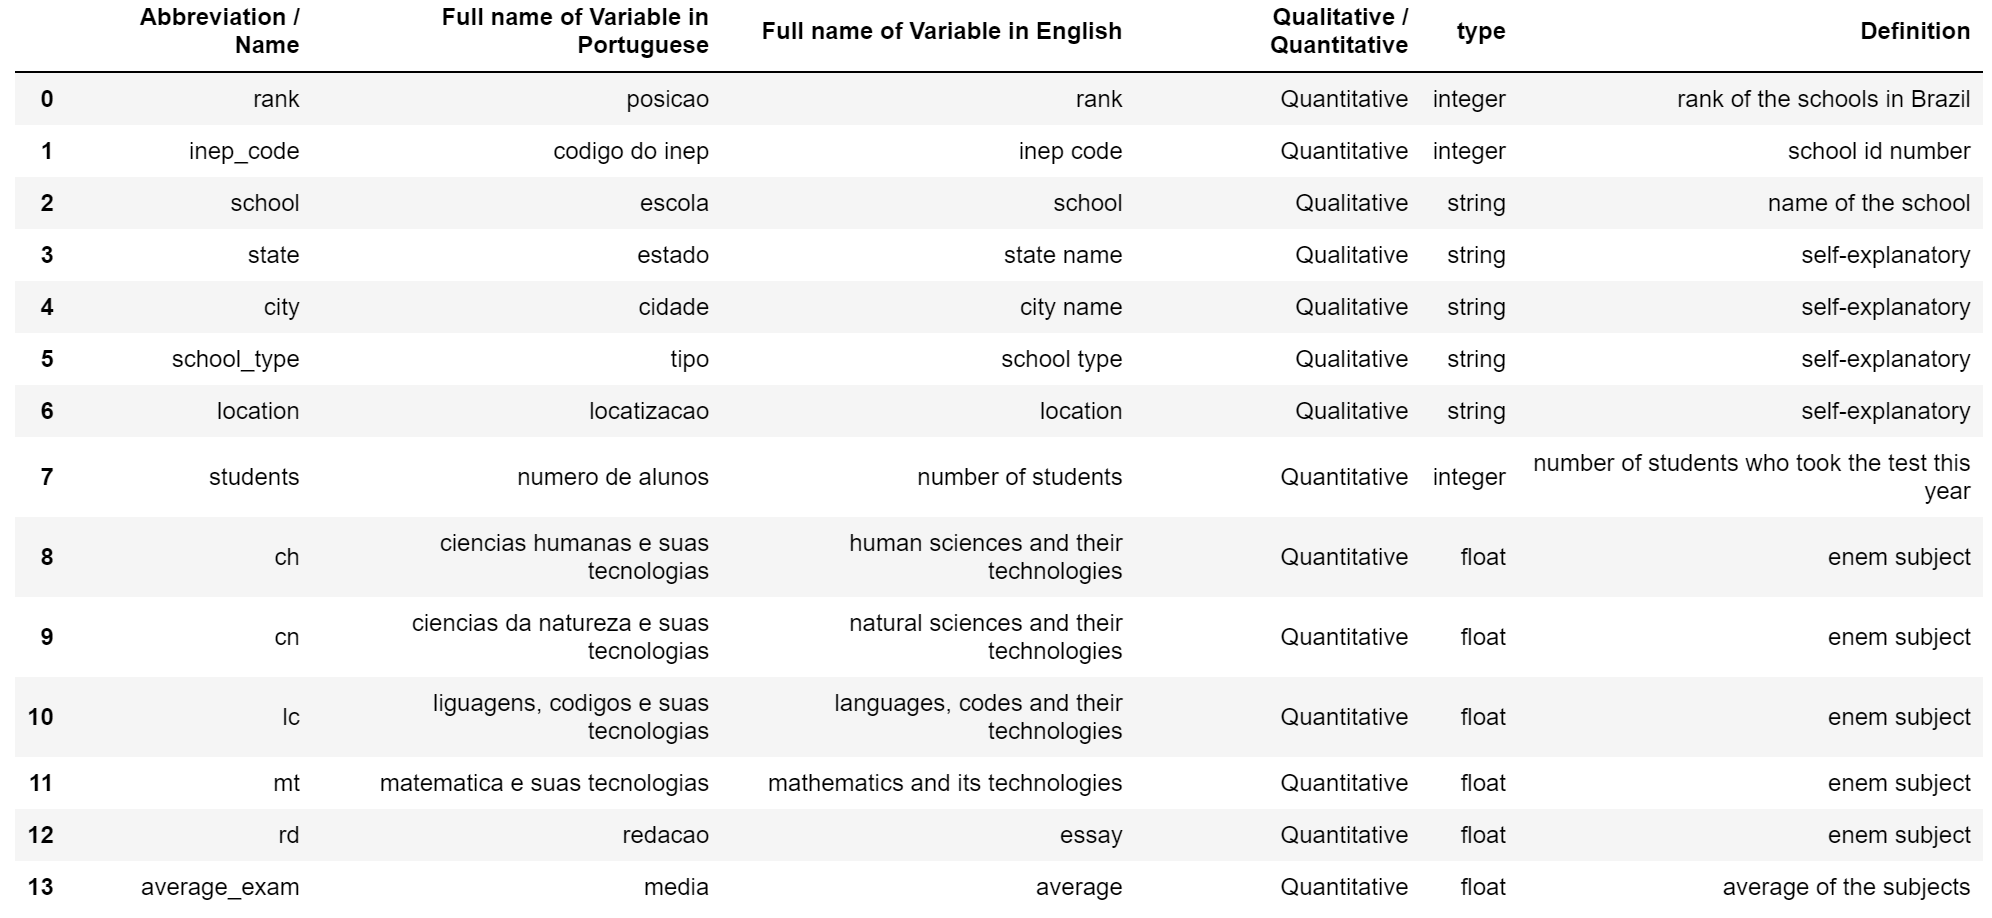

## 2.2 First look

In [2]:
# Reading the dataset
enem = pd.read_csv("enem_complete.csv")
enem.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


## 2.3 Exploratory Data Analysis

### 2.3.1 Info and describe

In [3]:
# Showing some info
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19598 entries, 0 to 19597
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          19598 non-null  int64  
 1   inep_code     19598 non-null  int64  
 2   school        19598 non-null  object 
 3   state         19598 non-null  object 
 4   city          19598 non-null  object 
 5   school_type   19598 non-null  object 
 6   location      19598 non-null  object 
 7   students      19598 non-null  int64  
 8   ch            19598 non-null  float64
 9   cn            19598 non-null  float64
 10  lc            19598 non-null  float64
 11  mt            19598 non-null  float64
 12  rd            19598 non-null  float64
 13  average_exam  19598 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 2.1+ MB


In [4]:
# Showing some info
enem.describe()

,rank,inep_code,students,ch,cn,lc,mt,rd,average_exam
count,19598.000000,1.959800e+04,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000,19598.000000
mean,9799.499949,3.247308e+07,46.481988,504.924703,472.743004,517.846299,522.267425,576.807078,518.917680
std,5657.599574,9.324204e+06,46.220439,46.444994,46.433354,36.839751,68.626260,108.502122,58.754365
min,1.000000,1.100006e+07,10.000000,396.650000,380.660000,377.890000,401.860000,138.890000,360.460000
25%,4900.250000,2.611379e+07,17.000000,472.180000,440.000000,492.250000,474.522500,504.290000,478.460000
50%,9799.500000,3.304433e+07,30.000000,495.610000,458.795000,514.660000,501.550000,554.670000,503.760000
75%,14698.750000,3.590848e+07,58.000000,528.330000,492.517500,538.660000,548.925000,633.585000,547.030000
max,19598.000000,5.308200e+07,616.000000,695.670000,682.900000,652.910000,845.890000,938.950000,760.180000


In [5]:
# looking for objects
enem.describe(include = object)

,school,state,city,school_type,location
count,19598,19598,19598,19598,19598
unique,18789,27,4742,4,2
top,EE - COLEGIO ESTADUAL LUIS EDUARDO MAGALHAES,São Paulo,São Paulo,Estadual,Urbana
freq,18,4330,905,14666,18752


### 2.3.2 Shape, size and number of zeros

In [6]:
# Checking the shape
enem.shape

(19598, 14)

In [7]:
# Checking the size
enem.size

274372

In [8]:
# Checking the number of zeros
number_of_zeros = (enem.to_numpy() == 0).sum()
print (number_of_zeros)

0


### 2.3.3 Duplicated rows

In [9]:
# looking for duplicated rows
dup_enem = enem[enem.duplicated()]

In [10]:
# Showing the number of duplicated rows
print("Number of duplicated rows: ", dup_enem.shape)

Number of duplicated rows:  (0, 14)


### 2.3.4 Missing values

In [11]:
#looking for missing values
enem.isna().sum()

rank            0
inep_code       0
school          0
state           0
city            0
school_type     0
location        0
students        0
ch              0
cn              0
lc              0
mt              0
rd              0
average_exam    0
dtype: int64

### 2.3.5 Outliers

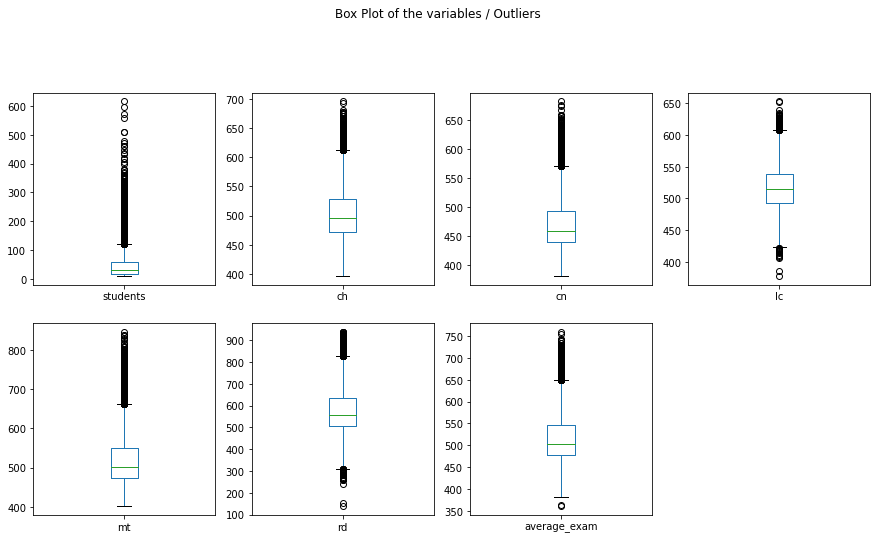

In [12]:
# Showing outliers using boxplot
enem.drop(['rank', 'inep_code'], axis=1).plot(kind='box',                                  
                                              subplots=True,                              
                                              layout=(3,4),                              
                                              figsize=(15,12),                               
                                              title='Box Plot of the variables / Outliers')
plt.show()

## 2.4 EDA Visualizations

### 2.4.1 Showing categorical variables

[Text(0.5, 1.0, 'Distribution of school_type')]

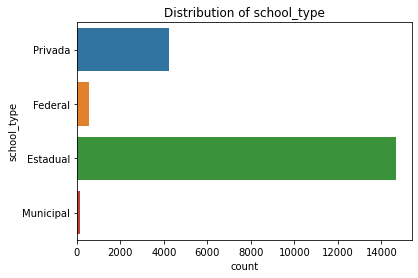

In [13]:
# Showing categorical variables
sns.countplot(y='school_type', data=enem).set(title='Distribution of school_type')

In [14]:
# Showing categorical in numbers
enem["school_type"].value_counts()

Estadual     14666
Privada       4252
Federal        547
Municipal      133
Name: school_type, dtype: int64

Text(0.5, 1.0, 'Distribution of school_type')

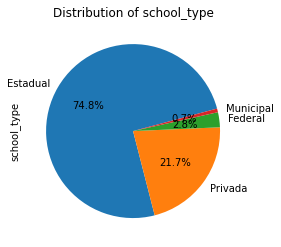

In [15]:
# Showing the percentage of Diesel and Petrol
labels_st = ["Estadual", "Privada", 'Federal', 'Municipal']
pie_class = enem["school_type"].value_counts().plot(kind='pie',
                                            autopct="%1.1f%%", 
                                            startangle = 15,
                                            labels = labels_st)
pie_class.set_title("Distribution of school_type")



[Text(0.5, 1.0, 'Checking school_type considering the best 5k')]

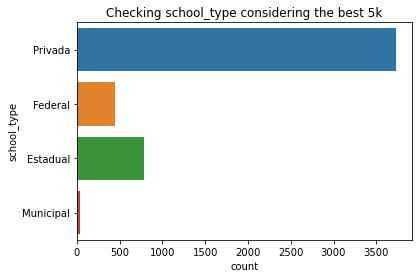

In [16]:
# Checking school_type considering the best 5k
sns.countplot(y='school_type', data=enem.iloc[0:5000]).set(title='Checking school_type considering the best 5k')

[Text(0.5, 1.0, 'Number of schools per location')]

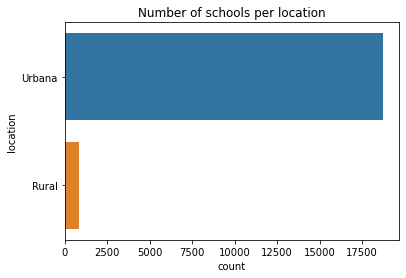

In [17]:
# Number of schools per location
sns.countplot(y='location', data=enem).set(title='Number of schools per location')

In [18]:
# Showing categorical in numbers
enem["location"].value_counts()

Urbana    18752
Rural       846
Name: location, dtype: int64

Text(0.5, 1.0, 'Distribution of location')

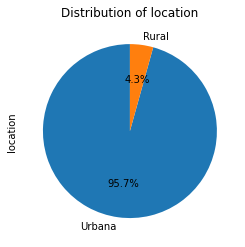

In [19]:
# Showing the percentage of Diesel and Petrol
labels_st = ["Urbana", "Rural"]
pie_class = enem["location"].value_counts().plot(kind='pie',
                                            autopct="%1.1f%%", 
                                            startangle = 90,
                                            labels = labels_st)
pie_class.set_title("Distribution of location")



[Text(0.5, 1.0, 'Number of schools per state')]

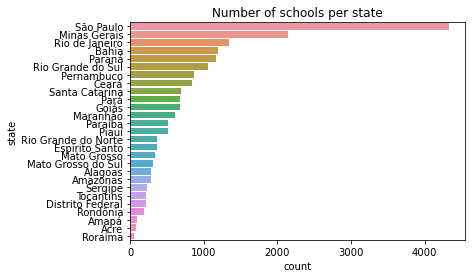

In [20]:
# Number of schools per state
sns.countplot(y='state', 
              data=enem, 
              order = enem['state'].value_counts().index).set(title='Number of schools per state')

In [21]:
# Number of schools per state
enem["state"].value_counts()

São Paulo              4330
Minas Gerais           2143
Rio de Janeiro         1346
Bahia                  1193
Paraná                 1167
Rio Grande do Sul      1059
Pernambuco              861
Ceará                   840
Santa Catarina          687
Pará                    676
Goiás                   671
Maranhão                602
Paraíba                 512
Piauí                   508
Rio Grande do Norte     368
Espirito Santo          366
Mato Grosso             339
Mato Grosso do Sul      310
Alagoas                 284
Amazonas                282
Sergipe                 226
Tocantins               219
Distrito Federal        214
Rondônia                181
Amapá                    86
Acre                     82
Roraima                  46
Name: state, dtype: int64

### 2.4.2 Showing numerical variables

[Text(0.5, 1.0, 'Distribution of students')]

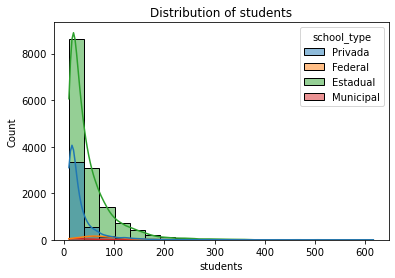

In [22]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="students",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of students')

[Text(0.5, 1.0, 'Distribution of ch - Grades')]

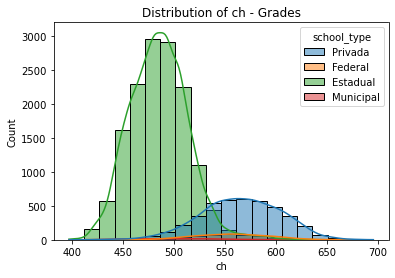

In [23]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="ch",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of ch - Grades')

[Text(0.5, 1.0, 'Distribution of cn - Grades')]

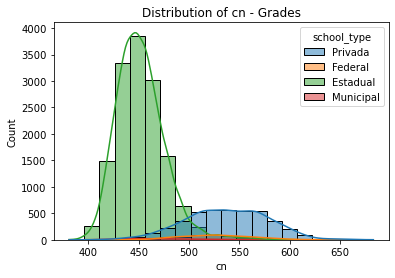

In [24]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="cn",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of cn - Grades')

[Text(0.5, 1.0, 'Distribution of lc - Grades')]

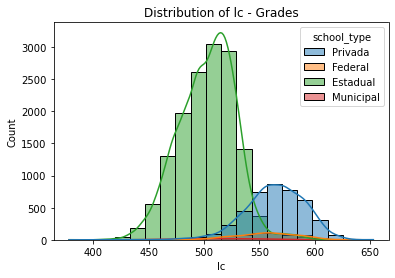

In [25]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="lc",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of lc - Grades')

[Text(0.5, 1.0, 'Distribution of mt - Grades')]

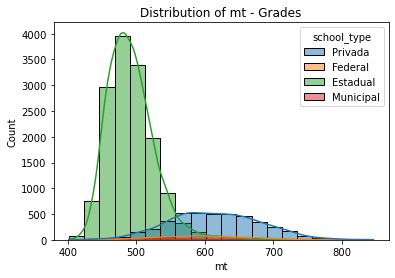

In [26]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="mt",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of mt - Grades')

[Text(0.5, 1.0, 'Distribution of rd - Grades')]

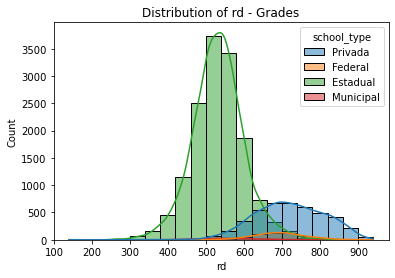

In [27]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="rd",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of rd - Grades')

[Text(0.5, 1.0, 'Distribution of average_exam - Grades')]

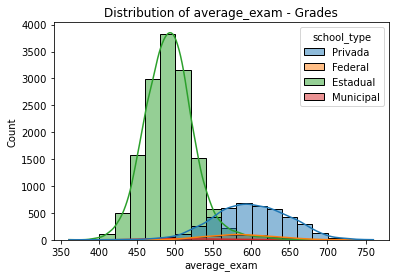

In [28]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="average_exam",
             kde=True,  
             bins=20, 
             hue="school_type").set(title='Distribution of average_exam - Grades')

[Text(0.5, 1.0, 'Distribution of average_exam - Grades')]

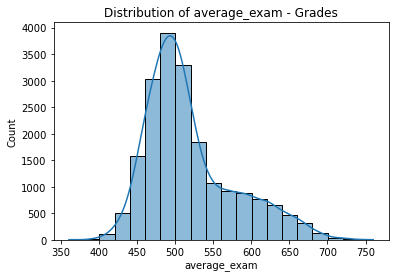

In [29]:
# Detailing the numerical variables
sns.histplot(data=enem, 
             x="average_exam",
             kde=True,  
             bins=20).set(title='Distribution of average_exam - Grades')

### 2.4.3 General overview

In [30]:
# # Extra Statistical information - Please, run!

# import pandas_profiling
# pandas_profiling.ProfileReport(enem)

# 3. DATA PREPARATION

In [31]:
# copying df
df_preparing = enem.copy()
df_preparing.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


## 3.1 Dropping unnecessary columns

In [32]:
# Dropping unnecessary columns
df_preparing.drop(["rank", "inep_code", 'school', 'city'], axis=1, inplace=True)
df_preparing.head(3)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,Minas Gerais,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


## 3.2 Dealing with Outliers

As it was possible to confirm during previous steps, there are some outliers in this dataset. However, I decided that they are important for the analysis, and consequently, I decided to keep them in the dataset. I took this decision because after the EDA stage I could realize that part of the data that are shown as outliers in the boxplot are related to private schools, since their performance is better when compared with the majority of the schools in the dataset.

## 3.3 Separating the 26 states and DF

[Text(0.5, 1.0, 'Number of schools per state')]

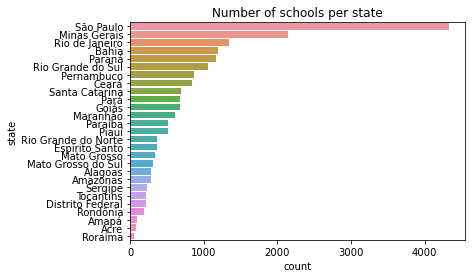

In [33]:
# Number of schools per state
sns.countplot(y='state', 
              data=enem, 
              order = enem['state'].value_counts().index).set(title='Number of schools per state')

In [34]:
# Number of schools per state
enem["state"].value_counts()

São Paulo              4330
Minas Gerais           2143
Rio de Janeiro         1346
Bahia                  1193
Paraná                 1167
Rio Grande do Sul      1059
Pernambuco              861
Ceará                   840
Santa Catarina          687
Pará                    676
Goiás                   671
Maranhão                602
Paraíba                 512
Piauí                   508
Rio Grande do Norte     368
Espirito Santo          366
Mato Grosso             339
Mato Grosso do Sul      310
Alagoas                 284
Amazonas                282
Sergipe                 226
Tocantins               219
Distrito Federal        214
Rondônia                181
Amapá                    86
Acre                     82
Roraima                  46
Name: state, dtype: int64

In [35]:
# Separating the 26 states and DF

for states in enem["state"]:
    
    if states == "São Paulo":
        sp = enem.loc[enem["state"]=="São Paulo"]
        
    elif states == "Minas Gerais":
        mg = enem.loc[enem["state"]=="Minas Gerais"]
        
    elif states == "Rio de Janeiro":
        rj = enem.loc[enem["state"]=="Rio de Janeiro"]
        
    elif states == "Bahia":
        ba = enem.loc[enem["state"]=="Bahia"]
                 
    elif states == "Paraná":
        pr = enem.loc[enem["state"]=="Paraná"]
        
        
    elif states == "Rio Grande do Sul":
        rs = enem.loc[enem["state"]=="Rio Grande do Sul"]
        
        
    elif states == "Pernambuco":
        pe = enem.loc[enem["state"]=="Pernambuco"]
        
        
    elif states == "Ceará":
        ce = enem.loc[enem["state"]=="Ceará"]
        
        
    elif states == "Santa Catarina":
        sc = enem.loc[enem["state"]=="Santa Catarina"]
        
        
    elif states == "Pará":
        pa = enem.loc[enem["state"]=="Pará"]
        
        
    elif states == "Goiás":
        go = enem.loc[enem["state"]=="Goiás"]
        
        
    elif states == "Maranhão":
        ma = enem.loc[enem["state"]=="Maranhão"]
        
        
    elif states == "Paraíba":
        pb = enem.loc[enem["state"]=="Paraíba"]
        
        
    elif states == "Piauí":
        pi = enem.loc[enem["state"]=="Piauí"]
        
        
    elif states == "Rio Grande do Norte":
        rn = enem.loc[enem["state"]=="Rio Grande do Norte"]
        
        
    elif states == "Espirito Santo":
        es = enem.loc[enem["state"]=="Espirito Santo"]
        
        
    elif states == "Mato Grosso":
        mt = enem.loc[enem["state"]=="Mato Grosso"]
        
        
    elif states == "Mato Grosso do Sul":
        ms = enem.loc[enem["state"]=="Mato Grosso do Sul"]
        
        
    elif states == "Alagoas":
        al = enem.loc[enem["state"]=="Alagoas"]
        
        
    elif states == "Amazonas":
        am = enem.loc[enem["state"]=="Amazonas"]
        
        
    elif states == "Sergipe":
        se = enem.loc[enem["state"]=="Sergipe"]
        
        
    elif states == "Tocantins":
        to = enem.loc[enem["state"]=="Tocantins"]
        
        
    elif states == "Distrito Federal":
        df = enem.loc[enem["state"]=="Distrito Federal"]
        
        
    elif states == "Rondônia":
        ro = enem.loc[enem["state"]=="Rondônia"]
        
         
    elif states == "Amapá":
        ap = enem.loc[enem["state"]=="Amapá"]
        
         
    elif states == "Acre":
        ac = enem.loc[enem["state"]=="Acre"]
        
         
    elif states == "Roraima":
        rr = enem.loc[enem["state"]=="Roraima"]
        
 


In [36]:
# Showing Rio de Janeiro (rj) after using if
rj.head(5)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
12,13,33135827,COLEGIO E CURSO PENSI,Rio de Janeiro,Rio de Janeiro,Privada,Urbana,31,658.80,645.99,619.74,783.69,920.65,725.77
21,22,33040516,COLEGIO IPIRANGA,Rio de Janeiro,Petrópolis,Privada,Urbana,27,655.66,633.59,619.04,814.72,879.26,720.45
22,23,33178879,COLEGIO ALFA CEM BILINGUE,Rio de Janeiro,Rio de Janeiro,Privada,Urbana,13,646.41,621.19,617.39,798.65,918.46,720.42
23,24,33062633,COL DE SAO BENTO,Rio de Janeiro,Rio de Janeiro,Privada,Urbana,45,676.73,631.62,618.65,790.36,882.22,719.92
37,38,33145237,COLEGIO SAO JOAO BATISTA NOVA FRIBURGO,Rio de Janeiro,Nova Friburgo,Privada,Urbana,24,648.63,618.02,617.99,767.24,920.83,714.54


In [37]:
# Showing just Rio de Janeiro mean
rj["average_exam"].mean()

539.492771173849

In [38]:
# Average of each Brazilian state
average_state = pd.DataFrame(
    {'state_acronym': ["se", "ms", "rn", 
                       "pe", "pb", "ba", 
                       "mt", "ac", "ce",
           
                       "rr", "ro", "pa", 
                       "pi", "al", "to",
                       "ap", "am", "ma",
           
                       "df", "rj", "rs", 
                       "sc", "mg", "sp", 
                       "es", "pr", "go"],
     
     
     
     
                   'state_mean': [
                               se["average_exam"].mean(), ms["average_exam"].mean(), rn["average_exam"].mean(),               
                               pe["average_exam"].mean(), pb["average_exam"].mean(), ba["average_exam"].mean(),               
                               mt["average_exam"].mean(), ac["average_exam"].mean(), ce["average_exam"].mean(),

                               rr["average_exam"].mean(), ro["average_exam"].mean(), pa["average_exam"].mean(),               
                               pi["average_exam"].mean(), al["average_exam"].mean(), to["average_exam"].mean(),
                               ap["average_exam"].mean(), am["average_exam"].mean(), ma["average_exam"].mean(),

                               df["average_exam"].mean(), rj["average_exam"].mean(), rs["average_exam"].mean(),
                               sc["average_exam"].mean(), mg["average_exam"].mean(), sp["average_exam"].mean(),               
                               es["average_exam"].mean(), pr["average_exam"].mean(), go["average_exam"].mean()
              ]
    })
average_state

,state_acronym,state_mean
0,se,515.955398
1,ms,512.733710
2,rn,510.499239
3,pe,505.481370
4,pb,504.398945
5,ba,503.632590
6,mt,503.308437
7,ac,501.972195
8,ce,501.190774
9,rr,500.825652


In [39]:
# using the sorting to organize the state per average
average_state = average_state.sort_values(by=['state_mean'], ascending=False)
average_state.reset_index(drop=True)

,state_acronym,state_mean
0,df,551.316121
1,rj,539.492771
2,rs,536.958546
3,sc,533.276114
4,mg,531.799356
5,sp,530.511649
6,es,528.293415
7,pr,525.112322
8,go,517.949747
9,se,515.955398


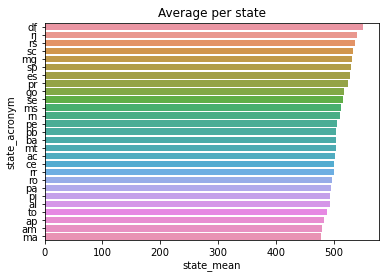

In [40]:
# Ploting the graph organized by mean
ax = sns.barplot(x="state_mean", y="state_acronym", 
                 data=average_state, 
                 order=average_state.sort_values('state_mean', 
                 ascending = False).state_acronym).set(title='Average per state')

## 3.4 Encoding

In [41]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location'])
df_encoded.head(3)

,state,students,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana
0,Ceará,35,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,1,0,1
1,Ceará,33,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,1,0,1
2,Minas Gerais,280,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,1,0,1


# TESTE DOS BRISADOS

In [42]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

NameError: name 'X' is not defined

# 4. FIRST SECTION

### Showing some info - RJ

In [43]:
rj.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
12,13,33135827,COLEGIO E CURSO PENSI,Rio de Janeiro,Rio de Janeiro,Privada,Urbana,31,658.80,645.99,619.74,783.69,920.65,725.77
21,22,33040516,COLEGIO IPIRANGA,Rio de Janeiro,Petrópolis,Privada,Urbana,27,655.66,633.59,619.04,814.72,879.26,720.45
22,23,33178879,COLEGIO ALFA CEM BILINGUE,Rio de Janeiro,Rio de Janeiro,Privada,Urbana,13,646.41,621.19,617.39,798.65,918.46,720.42


In [44]:
rj.tail(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
19461,19462,33060185,CIEP 383 MAXIMO GORKI,Rio de Janeiro,Nova Iguaçu,Estadual,Urbana,13,451.18,448.76,452.81,442.51,309.23,420.90
19471,19472,33099898,CIEP 346 BELARMINO ALFREDO DOS SANTOS,Rio de Janeiro,Queimados,Estadual,Urbana,13,428.18,434.09,467.86,430.05,340.00,420.04
19515,19516,33005362,CE WALDEMIRO PITA,Rio de Janeiro,Cambuci,Estadual,Rural,11,447.06,400.59,455.21,406.40,363.64,414.58


In [45]:
rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 12 to 19515
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          1346 non-null   int64  
 1   inep_code     1346 non-null   int64  
 2   school        1346 non-null   object 
 3   state         1346 non-null   object 
 4   city          1346 non-null   object 
 5   school_type   1346 non-null   object 
 6   location      1346 non-null   object 
 7   students      1346 non-null   int64  
 8   ch            1346 non-null   float64
 9   cn            1346 non-null   float64
 10  lc            1346 non-null   float64
 11  mt            1346 non-null   float64
 12  rd            1346 non-null   float64
 13  average_exam  1346 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 157.7+ KB


### Showing RJ distribution

[Text(0.5, 1.0, 'RJ - Distribution of average_exam - Grades')]

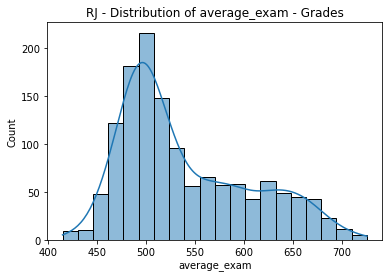

In [46]:
# Detailing the numerical variables
sns.histplot(data=rj, 
             x="average_exam",
             kde=True,  
             bins=20).set(title='RJ - Distribution of average_exam - Grades')

[Text(0.5, 1.0, 'RJ - Distribution of average_exam - Grades')]

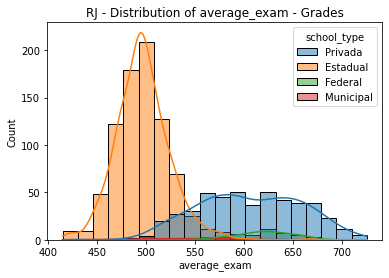

In [47]:
# Detailing the numerical variables
sns.histplot(data=rj, 
             x="average_exam",
             kde=True,
             hue="school_type",
             bins=20).set(title='RJ - Distribution of average_exam - Grades')

### RJ State Schools - Distribution

In [48]:
# Creating the variable 
rj_state_schools = rj.loc[rj["school_type"]=="Estadual"]

[Text(0.5, 1.0, 'RJ State Schools - Distribution of average_exam - Grades')]

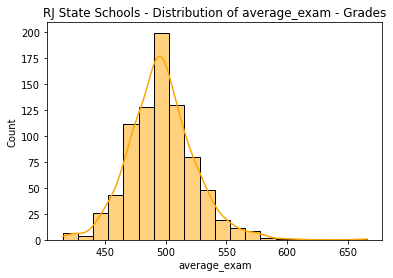

In [49]:
# Detailing the numerical variables
sns.histplot(data=rj_state_schools, 
             x="average_exam",
             kde=True,
             color="orange",
             #hue="school_type",
             bins=20).set(title='RJ State Schools - Distribution of average_exam - Grades')

### RJ Private Schools - Distribution

In [50]:
# Creating the variable 
rj_private_schools = rj.loc[rj["school_type"]=="Privada"]

[Text(0.5, 1.0, 'RJ Private Schools - Distribution of average_exam - Grades')]

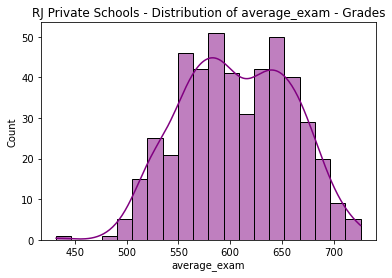

In [51]:
# Detailing the numerical variables
sns.histplot(data=rj_private_schools, 
             x="average_exam",
             kde=True,
             #hue="school_type",
             color="purple",
             bins=20).set(title='RJ Private Schools - Distribution of average_exam - Grades')

### 5 number summary - Brazil - average_exam

In [52]:
# Using .describe() the show the 5 number summary
enem["average_exam"].describe()

count    19598.000000
mean       518.917680
std         58.754365
min        360.460000
25%        478.460000
50%        503.760000
75%        547.030000
max        760.180000
Name: average_exam, dtype: float64

### 5 number summary - RJ - average_exam

In [53]:
# Using .describe() the show the 5 number summary
rj["average_exam"].describe()

count    1346.000000
mean      539.492771
std        65.948431
min       414.580000
25%       490.785000
50%       516.300000
75%       585.802500
max       725.770000
Name: average_exam, dtype: float64

### 5 number summary - RJ State Schools - average_exam

In [54]:
# Using .describe() the show the 5 number summary
rj_state_schools["average_exam"].describe()

count    819.000000
mean     496.566728
std       27.310719
min      414.580000
25%      479.150000
50%      495.280000
75%      511.315000
max      666.010000
Name: average_exam, dtype: float64

### 5 number summary - RJ Private Schools - average_exam

In [55]:
# Using .describe() the show the 5 number summary
rj_private_schools["average_exam"].describe()

count    474.000000
mean     606.099409
std       52.266809
min      432.140000
25%      565.965000
50%      603.065000
75%      647.240000
max      725.770000
Name: average_exam, dtype: float64

### Creating a random sample - RJ

In [56]:
# Creating a random sample
rj_average = list(rj["average_exam"])

random.seed(0)

rj_sample = random.sample(rj_average, 25)
rj_sample

[505.46,
 499.65,
 662.2,
 537.22,
 488.24,
 491.69,
 502.19,
 522.64,
 492.37,
 510.56,
 473.8,
 557.4,
 489.67,
 599.87,
 528.04,
 599.49,
 628.63,
 464.22,
 539.51,
 484.43,
 469.72,
 596.52,
 521.03,
 625.93,
 641.56]

In [57]:
# Finding the mean of the sample
np.mean(rj_sample)

537.2815999999999

In [58]:
# Finding the standard deviation of the sample
np.std(rj_sample)

58.24748438722482

### Preparing the formula - RJ

In [59]:
# mean of the sample
x1_rj = np.mean(rj_sample)

In [60]:
# mean of the population
X2 = 524.54

In [61]:
# standard deviation of the sample
s_rj = np.std(rj_sample)

In [62]:
# squate root
n_sqrt_rj= math.sqrt(25)
n_sqrt_rj

5.0

### t-test (RJ)

In [63]:
# t-test - RJ
t_rj = (x1_rj-X2)/(s_rj/n_sqrt_rj)
t_rj

1.093746805895922

### Creating a random sample - RJ State Schools

In [64]:
# Creating a random sample
rj_state_average = list(rj_state_schools["average_exam"])

random.seed(0)

rj_state_sample = random.sample(rj_state_average, 25)
rj_state_sample

[496.29,
 455.0,
 493.85,
 541.47,
 506.11,
 488.18,
 490.11,
 494.86,
 443.83,
 502.15,
 490.61,
 497.94,
 481.06,
 509.66,
 488.65,
 519.61,
 503.42,
 519.52,
 456.05,
 526.65,
 476.53,
 414.58,
 506.63,
 486.23,
 467.18]

In [65]:
# Finding the mean of the sample
np.mean(rj_state_sample)

490.2468

In [66]:
# Finding the standard deviation of the sample
np.std(rj_state_sample)

26.929324643592533

### Preparing the formula - RJ State Schools

In [67]:
# mean of the sample
x1_rj_state = np.mean(rj_state_sample)

In [68]:
# mean of the population
X2 = 524.54

In [69]:
# standard deviation of the sample
s_rj_state = np.std(rj_state_sample)

In [70]:
# squate root
n_sqrt_rj= math.sqrt(25)
n_sqrt_rj

5.0

### t-test (RJ State Schools)

In [71]:
# t-test - RJ State
t_rj_state = (x1_rj_state-X2)/(s_rj_state/n_sqrt_rj)
t_rj_state

-6.367259568122805

### Creating a random sample - RJ Private Schools

In [72]:
# Creating a random sample
rj_private_average = list(rj_private_schools["average_exam"])

random.seed(0)

rj_private_sample = random.sample(rj_private_average, 25)
rj_private_sample

[531.19,
 620.79,
 554.82,
 518.6,
 613.83,
 690.0,
 643.66,
 596.52,
 600.37,
 617.67,
 496.18,
 550.86,
 537.31,
 636.99,
 601.8,
 625.93,
 584.95,
 517.81,
 511.82,
 648.8,
 597.38,
 665.3,
 640.48,
 555.23,
 672.59]

In [73]:
# Finding the mean of the sample
np.mean(rj_private_sample)

593.2352000000001

In [74]:
# Finding the standard deviation of the sample
np.std(rj_private_sample)

53.92640919772055

### Preparing the formula - RJ Private Schools

In [75]:
# mean of the sample
x1_rj_private = np.mean(rj_private_sample)

In [76]:
# mean of the population
X2 = 524.54

In [77]:
# standard deviation of the sample
s_rj_private = np.std(rj_private_sample)

In [78]:
# squate root
n_sqrt_rj= math.sqrt(25)
n_sqrt_rj

5.0

### t-test (RJ Private Schools)

In [79]:
# t-test - RJ Private
t_rj_private = (x1_rj_private-X2)/(s_rj_private/n_sqrt_rj)
t_rj_private

6.369346765527254

# 5. SECOND SECTION

In [80]:
df_preparing.head(2)

,state,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34


In [81]:
df_encoded.head(2)

,state,students,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana
0,Ceará,35,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,1,0,1
1,Ceará,33,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,1,0,1


### Correlation Analysis

In [82]:
df_preparing.corr(method='spearman')

,students,ch,cn,lc,mt,rd,average_exam
students,1.000000,-0.001790,-0.000242,0.003342,0.012298,0.074318,0.035402
ch,-0.001790,1.000000,0.917496,0.949579,0.899279,0.822149,0.949637
cn,-0.000242,0.917496,1.000000,0.906532,0.902356,0.816644,0.938915
lc,0.003342,0.949579,0.906532,1.000000,0.894698,0.806192,0.939114
mt,0.012298,0.899279,0.902356,0.894698,1.000000,0.819859,0.941153
rd,0.074318,0.822149,0.816644,0.806192,0.819859,1.000000,0.935592
average_exam,0.035402,0.949637,0.938915,0.939114,0.941153,0.935592,1.000000


In [83]:
df_preparing.corr(method='kendall')

,students,ch,cn,lc,mt,rd,average_exam
students,1.000000,-0.000663,0.000816,0.002830,0.009128,0.052932,0.025581
ch,-0.000663,1.000000,0.761830,0.813518,0.735267,0.635051,0.813433
cn,0.000816,0.761830,1.000000,0.744495,0.740272,0.629745,0.796029
lc,0.002830,0.813518,0.744495,1.000000,0.727143,0.616960,0.793300
mt,0.009128,0.735267,0.740272,0.727143,1.000000,0.631815,0.798688
rd,0.052932,0.635051,0.629745,0.616960,0.631815,1.000000,0.785595
average_exam,0.025581,0.813433,0.796029,0.793300,0.798688,0.785595,1.000000


In [84]:
df_preparing.corr(method='pearson')

,students,ch,cn,lc,mt,rd,average_exam
students,1.000000,0.029988,0.021889,0.035938,0.031819,0.070456,0.046163
ch,0.029988,1.000000,0.946825,0.955913,0.934893,0.866870,0.966193
cn,0.021889,0.946825,1.000000,0.918505,0.949427,0.866444,0.964737
lc,0.035938,0.955913,0.918505,1.000000,0.905033,0.843832,0.944791
mt,0.031819,0.934893,0.949427,0.905033,1.000000,0.862999,0.963709
rd,0.070456,0.866870,0.866444,0.843832,0.862999,1.000000,0.950760
average_exam,0.046163,0.966193,0.964737,0.944791,0.963709,0.950760,1.000000


### Heatmaps

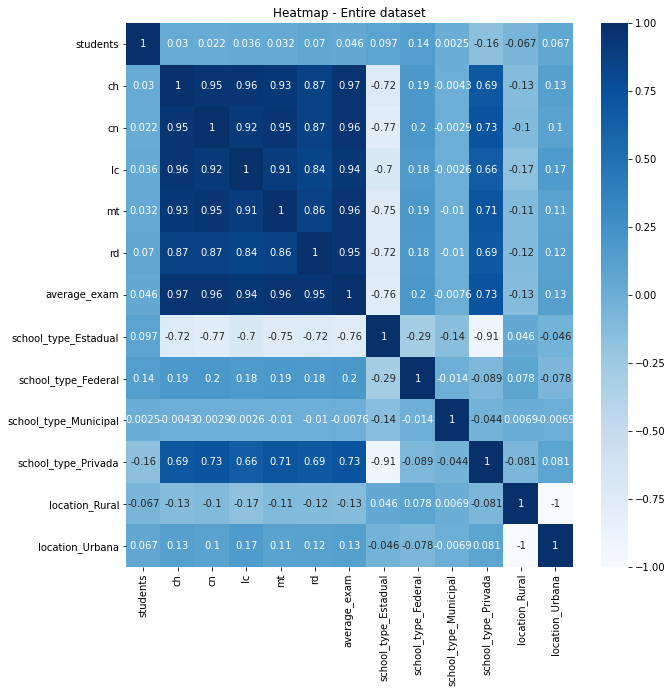

In [85]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

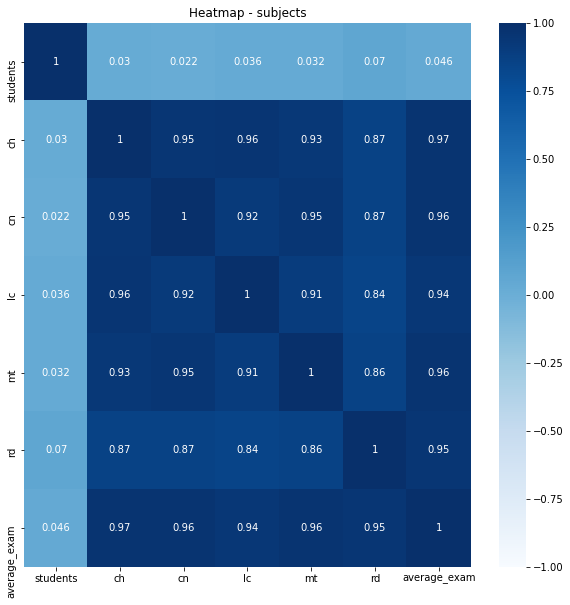

In [86]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_preparing.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - subjects')

### Scatter Plots

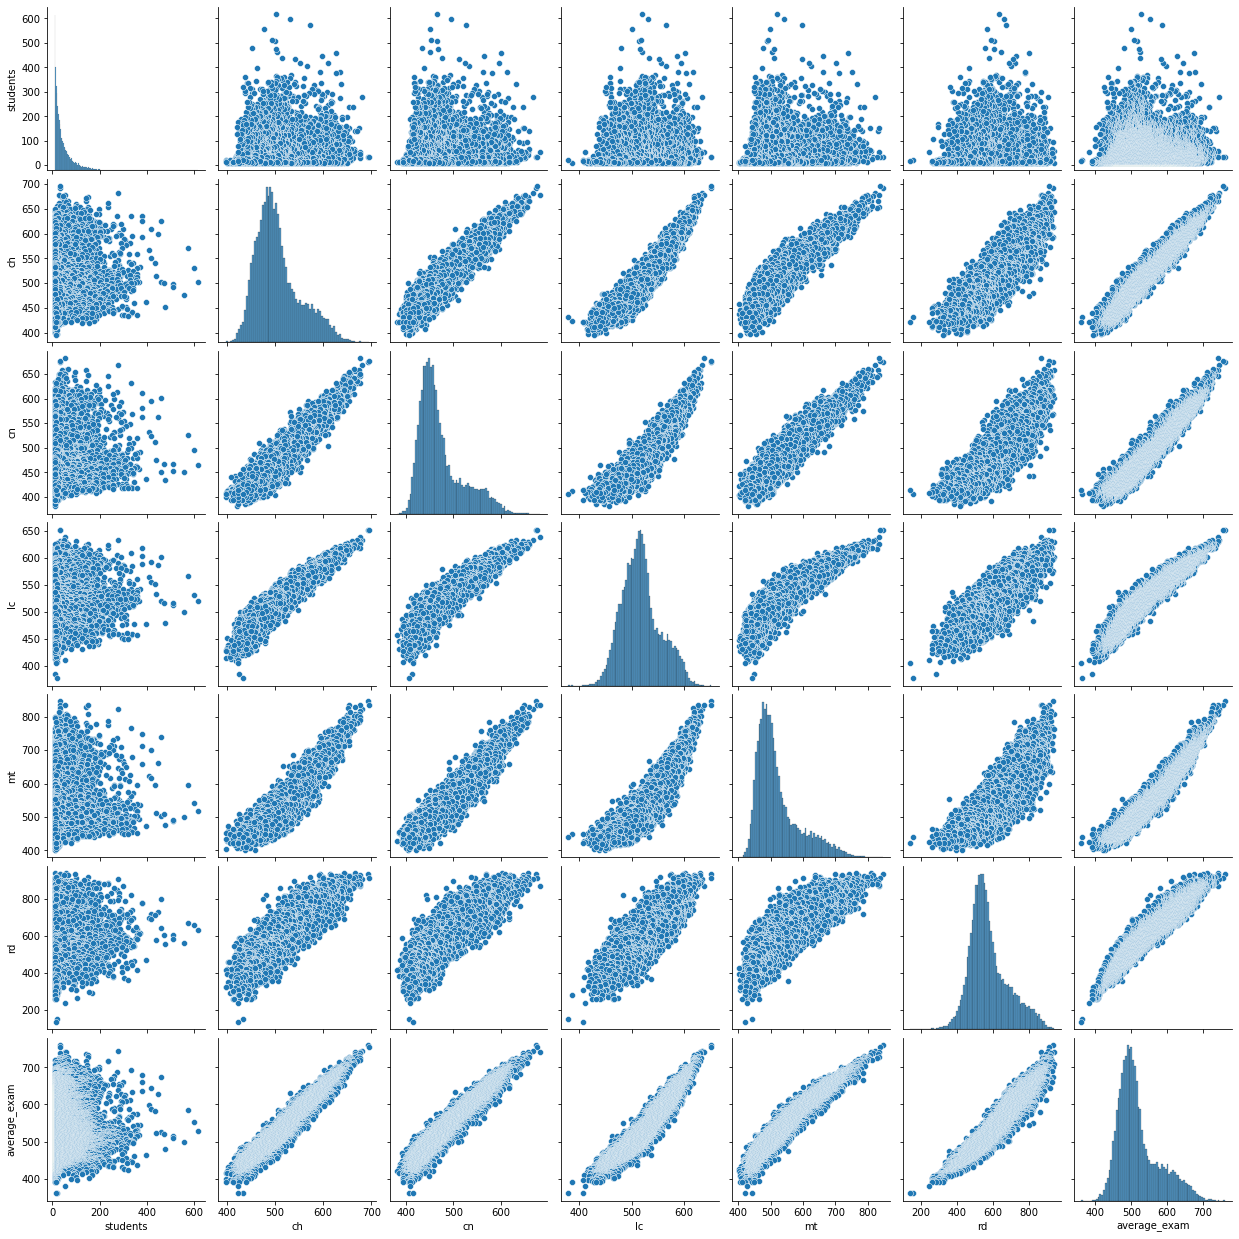

In [87]:
# Checking variables' relation

sns.pairplot(df_preparing)

[Text(0.5, 1.0, 'Scatter Plot (mt X lc)')]

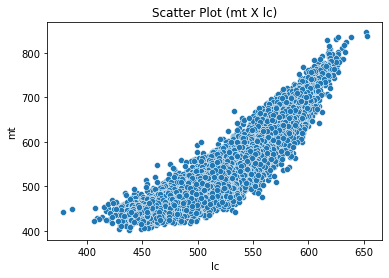

In [88]:
# Checking variables' relation

sns.scatterplot(data=df_preparing, x="lc", y="mt").set(title='Scatter Plot (mt X lc)')

### Regression Line

In [89]:
# best fit polynomials
# polynomial
mt_grade = np.polyfit(df_preparing.lc, df_preparing.mt, 1)

mt_grade

array([   1.68592363, -350.78188921])

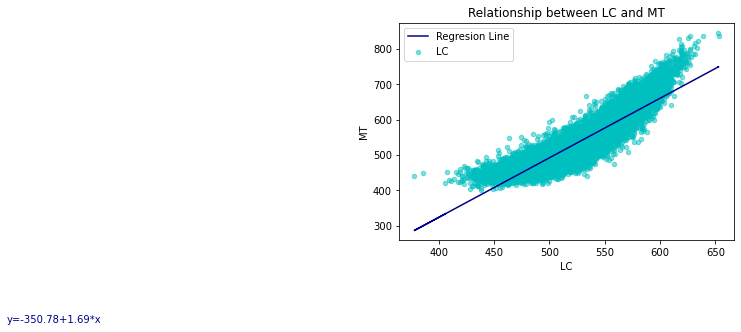

In [90]:
# scatter plots and regression lines

# Scatter plots.
ax1 = df_preparing.plot(kind='scatter', x='lc', y='mt', color='c', alpha=0.5)

# regression lines
plt.plot(df_preparing.lc, mt_grade[0] * df_preparing.lc + mt_grade[1], color='darkblue')

# regression equations
plt.text(10, 25,'y={:.2f}+{:.2f}*x'.format( mt_grade[1],  mt_grade[0]), color='darkblue')

# legend, title and labels.
plt.legend(labels=['Regresion Line', 'LC', 'MT'])
plt.title('Relationship between LC and MT')
plt.xlabel('LC')
plt.ylabel('MT');

# 6. THIRD SECTION

## 6.1 Finding the Linear Regression Equation

In [91]:
from sklearn.linear_model import LinearRegression

# create linear regression object
regressor = LinearRegression()

# fitting the model
regressor.fit(df_preparing[['lc']], df_preparing['mt'])

# get the slope and intercept of the line best fit
print('intercept_ = ', regressor.intercept_)

print('coef_      = ', regressor.coef_)


intercept_ =  -350.78188920624007
coef_      =  [1.68592363]


## 6.2 Machine Learning

### 6.2.1 Splitting the dataset

In [92]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X = df_preparing['lc'].values
y = df_preparing['mt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### 6.2.2 Reshaping

In [93]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

### 6.2.4 Training the model

In [94]:
# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

LinearRegression()

### 6.2.5 Predicting the Test set result

In [95]:
# Predicting the Test set results
y_pred = regressor_LR.predict(X_test)
np.set_printoptions(precision=2) # only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))


[[477.87 473.97]
 [564.04 525.97]
 [527.41 515.77]
 ...
 [612.02 622.2 ]
 [650.58 673.74]
 [536.29 524.78]]


###  Predicting (numpy X scikit learn)

In [96]:
# predictions using numpy
print('Predictions using numpy (Second section): ' ,np.polyval(mt_grade, [630]))

# predictions using scikit learn
print('Predictions using Scikit Learn:           ', regressor_LR.predict([[630]]))


Predictions using numpy (Second section):  [711.35]
Predictions using Scikit Learn:            [711.71]


### 6.5 Precision

In [97]:
# Precision of the model - Train set
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

The precision of the model is 
0.8204417957755553


In [98]:
# Precision of the model - Test set
R_square = r2_score(y_test,y_pred) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8134992346756789


### 6.6 The equation

In [99]:
# the equation
print('coef =        ', regressor_LR.coef_)

print('intercept_ =  ', regressor_LR.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

coef =         [1.69]
intercept_ =   -352.2671336594657
Mean squared error: 868.64


In [100]:
# Linear Regression (lc and mt)
print('Linear Regression (lc and mt)')
print('coef =        ', regressor.coef_)
print('intercept_ =  ', regressor.intercept_)

##################
print('')
# Linear Regression (X_train and y_train)
print('Linear Regression (X_train and y_train)')
print('coef =        ', regressor_LR.coef_)
print('intercept_ =  ', regressor_LR.intercept_)



Linear Regression (lc and mt)
coef =         [1.69]
intercept_ =   -350.78188920624007

Linear Regression (X_train and y_train)
coef =         [1.69]
intercept_ =   -352.2671336594657


### Plotting Linear Regression

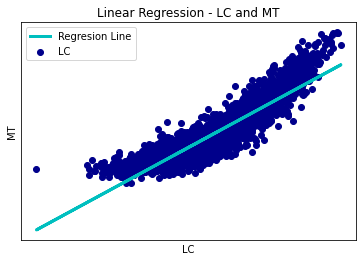

In [101]:
# Plot outputs
plt.scatter(X_test, y_test, color="darkblue")
plt.plot(X_test, y_pred, color="c", linewidth=3)

plt.xticks(())
plt.yticks(())

# legend, title and labels.
plt.legend(labels=['Regresion Line', 'LC', 'MT'])
plt.title('Linear Regression - LC and MT')
plt.xlabel('LC')
plt.ylabel('MT');

plt.show()